In [1]:
print("Hello World")

Hello World


In [5]:
import pandas as pd

# Cargar el archivo .CSV

df = pd.read_csv("students.csv")

<Axes: >

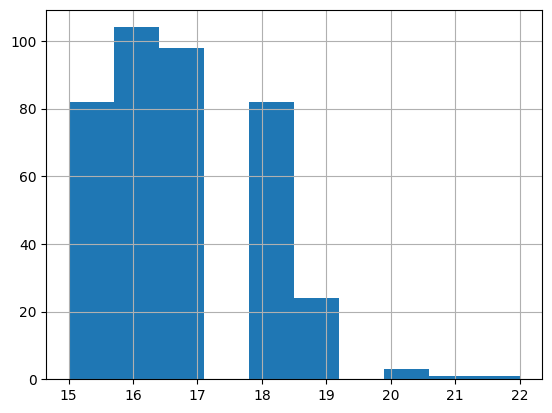

In [6]:
df["age"].hist()

In [5]:
df["school"].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [7]:
df["sex"].value_counts()

sex
F    208
M    187
Name: count, dtype: int64